In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Let us see how to build a machine learning model from scratch and classify the text data

**Step 1: Loading and reading the data**

Here we will use the panda's library to load the CSV file into the working environment and visualize the top 5 entries of the data frame using the head() function.

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/NLP-movie-review.csv')

viewing dataset

In [3]:
df.head()

,review,reaction
0,Service is friendly and inviting.,1
1,Awesome service and food.,1
2,Waitress was a little slow in service.,0
3,"Come hungry, leave happy and stuffed!",1
4,Horrible - don't waste your time and money.,0


Here the data frame can be observed and we can see that there are two columns in the dataset with column names review and reaction.

In [4]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0],df.shape[1]))

There are 1000 rows and 2 columns in the dataset


Here in this output, we can see that we are having 1000 rows and 2 columns in the dataset. Now let’s further check the, missing values for that we can use the isnull() function to check for missing values in the dataset

In [5]:
df.isnull().sum()

review      0
reaction    0
dtype: int64

Here we can see that the dataset is not having any missing values.

**Step 2: Data Manipulation**

In the target variable of the dataset, we are having values of 1 and 0. So let us manipulate the value of 1 to positive and 0 to negative.

In [6]:
df['reaction'].replace(to_replace=1,value='positive',inplace=True)
df['reaction'].replace(to_replace=0,value='negative',inplace=True)

In the replace function we have to mention the value to be replaced with the required value and we have to mention it placed as True to make permanent changes in the data. So with the changes made let us visualize the top entries of the dataset.

In [7]:
df.head()

,review,reaction
0,Service is friendly and inviting.,positive
1,Awesome service and food.,positive
2,Waitress was a little slow in service.,negative
3,"Come hungry, leave happy and stuffed!",positive
4,Horrible - don't waste your time and money.,negative


In the above output, we can see that the value of 1 is replaced with positive and the value of 0 is replaced with negative.

**Step 3: Vectorizing the data**

Converting textual data into numerical features is termed vectorization, similar to performing encoding in machine learning. 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(lowercase=True,stop_words='english',token_pattern='\w+')
X = tf_idf.fit_transform(df['review'].values)

Here the Term Frequency -Inverse Document Frequency library of the sklearn module is used to vectorize the textual data where all the text preprocessing steps are fed into the TF-IDF vectorizer instance by stating lower case conversion as True, mentioning stop words as English and the tokenization pattern as \w+ is used to match all the characters in the dataset ranging from (a-z) and (A-Z).

For easy interpretation let us convert the vectorized data frame into a pandas dataframe as shown below and compute the vocabulary length which is the number of rows in the vectorized dataframe.

In [9]:
X = pd.DataFrame(X.todense(),columns=tf_idf.get_feature_names())
print('Vocabulary length of count-vectorized data',len(X))

Vocabulary length of count-vectorized data 1000


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


looking at the final dataset

In [10]:
X.shape

(1000, 1832)

In [11]:
X

,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here in the vectorized data frame, we can see that it has 1000 rows and the TF-IDF vectorizer has vectorized 1832 textual features.

**Step 4: Splitting data into train and test**

The textual data is split into train and test using the scikit-learn model selection module and importing the train_test_split library from the module.

In [12]:
from sklearn.model_selection import train_test_split

Let us separate the target variable from the dataset

In [13]:
y=df['reaction']

Here let us split the data with a train: test ratio split of 70% and 30% respectively as shown below.

In [14]:
#Creating training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

Now as the dataset is split let us visualize the number of samples using the shape function as shown below.

In [15]:
#Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 1832)
(700,)
(300, 1832)
(300,)


In the above output, we can see that we are having 700 records for training and 300 records for testing in our data.

**Step 5: Building Multinomial Naive Bayes Model** 

As the TF-IDF model represents the table of independent word frequencies so to tackle this behaviour a Multinomial Naive Bayes would perform well due to its assumption related to features. Let us import the Multinomial Naive Bayes library of the scikit learn module as shown below.

In [16]:
from sklearn.naive_bayes import MultinomialNB

Let us use the imported Multinomial Naive Bayes and build a model instance and fit it with the split data.

In [17]:
mnb_mod=MultinomialNB()
mnb_model=mnb_mod.fit(X_train,y_train)

Using the fitted model let us obtain the predictions on the test data as shown below.

In [18]:
mnb_pred=mnb_model.predict(X_test)

As we have obtained the prediction of the MultiNomial Naive Bayes let us evaluate the model performance through various metrics like accuracy score and classification report

Let us import the required libraries from the scikit learn model first.

In [19]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

Let us print the accuracy score of the Multinomial Naive Bayes model as shown below.

In [20]:
print('Accuracy Score of Multinomial Naive Bayes model : {}'.format(accuracy_score(y_test,mnb_pred)))

Accuracy Score of Multinomial Naive Bayes model : 0.7266666666666667


We have obtained an accuracy score of 72.667% from the Multinomial Naive Bayes model developed.

Let us obtain a classification report for the same to evaluate various other factors as shown below.

In [21]:
print('Classification Report of Multinomial Naive Bayes model : \n ',classification_report(y_test,mnb_pred))

Classification Report of Multinomial Naive Bayes model : 
                precision    recall  f1-score   support

    negative       0.78      0.64      0.71       152
    positive       0.69      0.81      0.75       148

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.72       300



Here in the classification report, we can evaluate various factors like precision, recall, and f1-score for each of the classes of the dataset respectively.

Let us plot a confusion matrix to evaluate the various parameters like True Positives, True Negatives with False Positives, and negatives.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


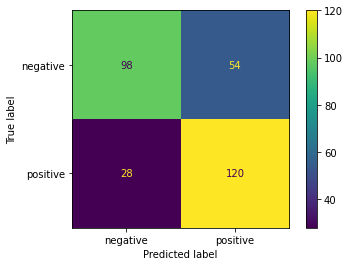

In [22]:
plot_confusion_matrix(mnb_model,X_test,y_test)
#plt.show()

Here in the confusion matrix, we can see that the various values of true positives and true negatives and suitable interpretations can be made accordingly.

**Step 6: Obtaining predictions from the MNB model**

Let us create a user-defined function to obtain predictions from the multinomial naive Bayes model as shown below

In [23]:
# def pred():
#   text_sent=input()
#   trans=tf_idf.transform([text_sent])
#   pred=mnb_model.predict(trans)
#   return pred
# print('Prediction',pred())